<a href="https://colab.research.google.com/github/surabhiwaingankar/face_emotion_recognition/blob/main/face_emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow
!pip install opencv-python
!pip install opencv-contrib-python



In [2]:
import cv2
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
!unzip archive.zip

unzip:  cannot find or open archive.zip, archive.zip.zip or archive.zip.ZIP.


In [4]:
img_array = cv2.imread("train/angry/Training_10118481.jpg")

cv2.imread() - can read image in form of array

In [5]:
img_array.shape

(48, 48, 3)

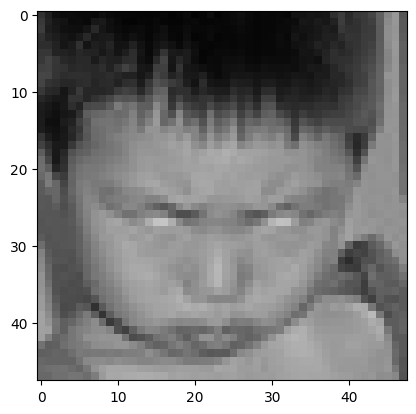

In [6]:
plt.imshow(img_array)

In [7]:
Datadirectory = 'train/' ##training dataset

In [8]:
classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

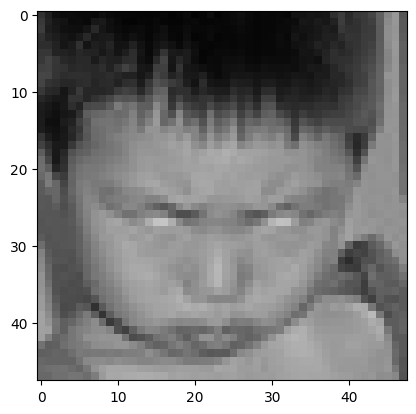

In [9]:
for category in classes:
  path = os.path.join(Datadirectory, category)
  for img in os.listdir(path):
    plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
    plt.show()
    break
  break

It converts the image from the BGR color space (which is the default color space used by OpenCV) to the RGB color space (which is commonly used in matplotlib).

In [10]:
img_size =224 #Image net required 224 X 224

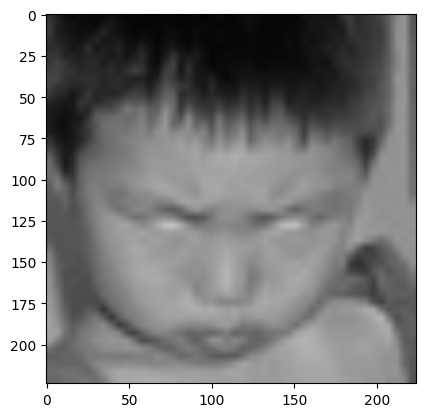

In [11]:
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array,  cv2.COLOR_BGR2RGB))
plt.show()

In [12]:
#read all img and convert then into 224 x 224 array
training_data = []

def create_training_data():
  for category in classes:
    path = os.path.join(Datadirectory, category)
    class_num = classes.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (img_size, img_size))
        training_data.append([new_array, class_num])
      except Exception as e:
        pass



In [13]:
test_data = []
def create_test_data():
  for category in classes:
    path = os.path.join('test/', category)
    class_num = classes.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (img_size, img_size))
        test_data.append([new_array, class_num])
      except Exception as e:
        pass


In [14]:
create_training_data()

In [15]:
training_data

[[array([[[25, 25, 25],
          [25, 25, 25],
          [25, 25, 25],
          ...,
          [98, 98, 98],
          [96, 96, 96],
          [96, 96, 96]],
  
         [[25, 25, 25],
          [25, 25, 25],
          [25, 25, 25],
          ...,
          [97, 97, 97],
          [96, 96, 96],
          [96, 96, 96]],
  
         [[25, 25, 25],
          [25, 25, 25],
          [25, 25, 25],
          ...,
          [98, 98, 98],
          [96, 96, 96],
          [96, 96, 96]],
  
         ...,
  
         [[29, 29, 29],
          [29, 29, 29],
          [29, 29, 29],
          ...,
          [ 1,  1,  1],
          [ 0,  0,  0],
          [ 0,  0,  0]],
  
         [[29, 29, 29],
          [29, 29, 29],
          [29, 29, 29],
          ...,
          [ 1,  1,  1],
          [ 0,  0,  0],
          [ 0,  0,  0]],
  
         [[29, 29, 29],
          [29, 29, 29],
          [29, 29, 29],
          ...,
          [ 1,  1,  1],
          [ 0,  0,  0],
          [ 0,  0,  0]]], dtype=u

In [16]:
print(len(training_data))

28709


In [17]:
import random
random.shuffle(training_data)

In [18]:
training_data = training_data[0: 2000]

In [19]:
X=[] # features/data
y=[] #labels
for features, labels in training_data:
  X.append(features)
  y.append(labels)

X =np.array(X).reshape(-1, img_size, img_size, 3)  #converting into 4d

In [20]:
X.shape

(2000, 224, 224, 3)

In [21]:
#normalize the data
X = X/225

**Deep Learning Model for training**

In [22]:
from tensorflow import keras
from tensorflow.keras import layers

In [23]:
import tensorflow as tf


In [24]:
model = tf.keras.applications.MobileNetV2() ##pretrained model

In [25]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

**Transfer Learning - tuning, weights**

In [26]:
base_input = model.layers[0].input

In [27]:
base_output = model.layers[-2].output

In [28]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [29]:
final_output = layers.Dense(128)(base_output) ## adding new layer, after the output f global pooling layer
final_output = layers.Activation('relu')(final_output) ## activation function
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output) # 7 classes, classifiction layer so softmax

In [30]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [31]:
new_model = keras.Model(inputs=base_input, outputs=final_output)

In [32]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [33]:
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

In [34]:
X= np.array(X)
y = np.array(y)

In [35]:
new_model.fit(X,y,epochs=15)

Epoch 1/15
63/63 [==============================] - 353s 5s/step - loss: 1.5773 - accuracy: 0.3920
Epoch 2/15
63/63 [==============================] - 338s 5s/step - loss: 1.3042 - accuracy: 0.5045
Epoch 3/15
63/63 [==============================] - 322s 5s/step - loss: 1.1253 - accuracy: 0.5745
Epoch 4/15
63/63 [==============================] - 321s 5s/step - loss: 1.0106 - accuracy: 0.6140
Epoch 5/15
63/63 [==============================] - 324s 5s/step - loss: 0.8754 - accuracy: 0.6850
Epoch 6/15
63/63 [==============================] - 318s 5s/step - loss: 0.7394 - accuracy: 0.7350
Epoch 7/15
63/63 [==============================] - 393s 6s/step - loss: 0.6311 - accuracy: 0.7685
Epoch 8/15
63/63 [==============================] - 324s 5s/step - loss: 0.5686 - accuracy: 0.7905
Epoch 9/15
63/63 [==============================] - 325s 5s/step - loss: 0.4637 - accuracy: 0.8325
Epoch 10/15
63/63 [==============================] - 322s 5s/step - loss: 0.4217 - accuracy: 0.8510
Epoch 11/

In [43]:
new_model.save('model')

In [36]:
frame =cv2.imread("happyboy.jpg")

In [37]:
frame.shape

(183, 275, 3)

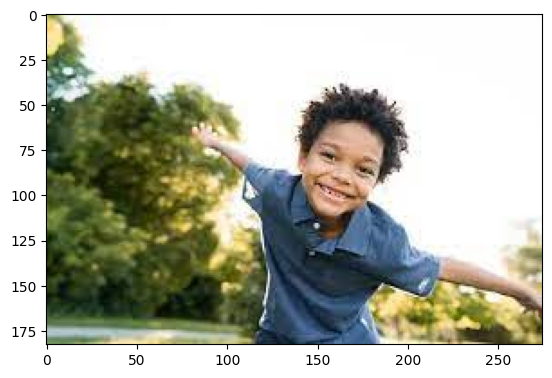

In [38]:
plt.imshow(cv2.cvtColor(frame,  cv2.COLOR_BGR2RGB))

In [39]:
#we need face detection algorithm

In [40]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+ 'haarcascade_frontalface_default.xml')

In [41]:
grey = cv2.cvtColor(frame,  cv2.COLOR_BGR2GRAY)

In [42]:
grey.shape

(183, 275)

In [44]:
faces = faceCascade.detectMultiScale(grey, 1.1, 4)
for x,y,w,h in faces:
  roi_grey= grey[y: y+h, x:x+w]
  roi_color= frame[y: y+h, x:x+w]
  cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)
  facess =  faceCascade.detectMultiScale(roi_grey)
  if len(facess) == 0:
    print("face not detected")
  else:
    for (ex, ey, ew, eh) in facess:
      faces_roi = roi_color[ey: ey+eh, ex: ex+ew]


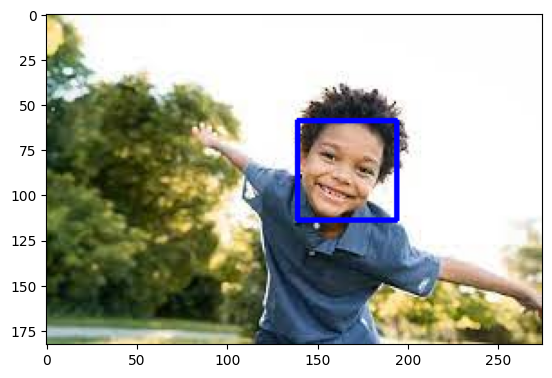

In [45]:
plt.imshow(cv2.cvtColor(frame,  cv2.COLOR_BGR2RGB))

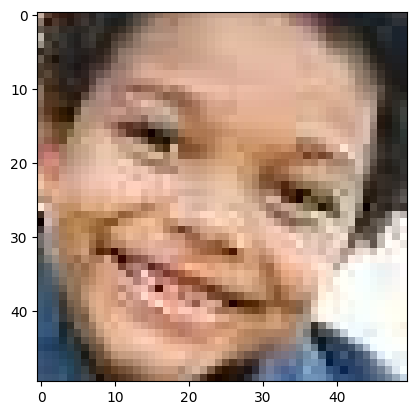

In [47]:
plt.imshow(cv2.cvtColor(faces_roi,  cv2.COLOR_BGR2RGB))

In [56]:
final_image = cv2.resize(faces_roi, (224,224))
final_image = np.expand_dims(final_image, axis=0)
final_image = final_image/255

In [57]:
Predictions = new_model.predict(final_image)

1/1 [==============================] - 2s 2s/step


In [58]:
Predictions[0]

array([5.1451525e-07, 4.5026058e-10, 3.4556184e-02, 1.7146976e-04,
       2.0015183e-05, 1.5066869e-09, 9.6525186e-01], dtype=float32)

In [59]:
np.argmax(Predictions)

6